<a href="https://colab.research.google.com/github/rizkifrtma11/Capstone-Project-Bangkit-2024-batch-2/blob/main/Machine-Learning/food_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RasaNusa: Fine-Tuned Deep Learning Architectures with ImageNetV2 for Image Classification, Attention Mechanism, and Residual Connections**


<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=19e53vp9zbwNRF7eX4eHaQjICXGNu6icg" width="300" height="300" style="vertical-align: middle;" />
</div>


**RasaNusa** is an image classification project designed to classify various images into predefined categories. The model is built using advanced deep learning techniques, including **fine-tuning** of a pre-trained **MobileNetV2** model, to enhance the accuracy and performance of the classification process. Specifically, the project leverages an **Attention Mechanism** and **Residual Connections** integrated with MobileNetV2, allowing it to effectively extract features from images while addressing issues like overfitting and focusing on relevant visual information. This approach enables the model to adapt to the specific dataset, improving its ability to classify images accurately across diverse categories.

## **Model Architecture Overview**

The architecture of this model is a combination of **Transfer Learning**, **Attention Mechanisms**, **Residual Connections**, and **Fine-Tuning** on **ImageNetV2**, designed to enhance the model's ability to classify images accurately and efficiently while adapting to the specific dataset. Here's a of the architecture:

1. **Base Model: MobileNetV2 (Pre-trained on ImageNetV2)**

2. **Attention Mechanism**

3. **Residual Connections**

4. **Multi-Branch Architecture**  

5. **Fully Connected Layers and Output**


## **1. Package Installation**

In [1]:
!pip install pydot==3.0.3 \
            graphviz==0.20.3 \
            tensorflow==2.15.0 \
            scikit-learn==1.5.2 \
            matplotlib==3.8.0 \
            seaborn==0.13.2 \
            Pillow==11.0.0 \
            pandas==2.2.2 \
            numpy==1.26.4 \
            ipywidgets==8.1.5

## **2. Import Libraries**

In [2]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2, DenseNet121, ResNet50
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam, AdamW
from sklearn.preprocessing import label_binarize
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from ipywidgets import widgets
import tensorflow as tf
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
import io

## **3. Mount Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **4. Import Datasets**

In [4]:
TRAIN_DIR = '/content/drive/MyDrive/Machine-Learning-Classification/data/train'
VALIDATION_DIR = '/content/drive/MyDrive/Machine-Learning-Classification/data/valid'
TEST_DIR = '/content/drive/MyDrive/Machine-Learning-Classification/data/test'

## **5. Visualize Sample Image of Datasets**

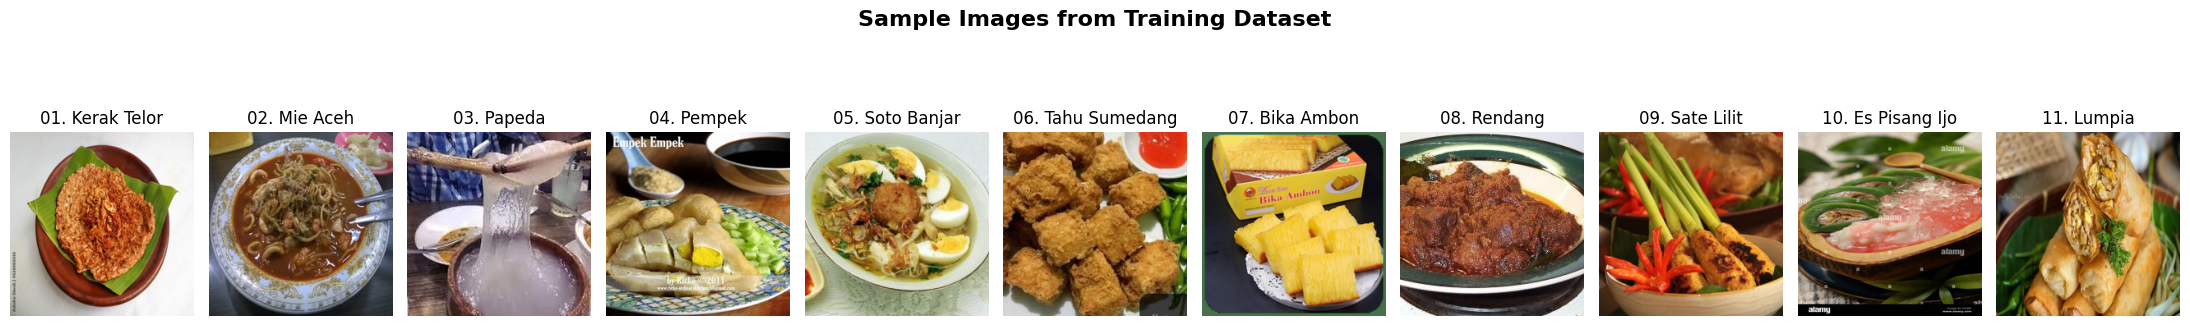

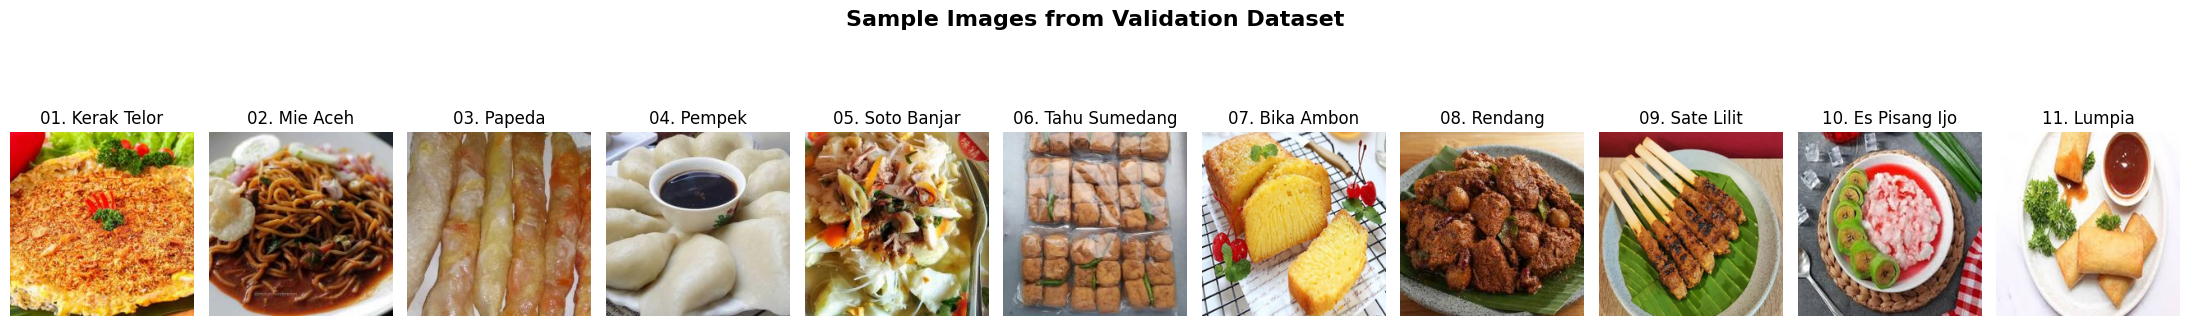

In [5]:
# Function to display one image per class in a dataset
def display_sample_image_from_directory(directory, ax):
    class_names = sorted([class_name for class_name in os.listdir(directory) if os.path.isdir(os.path.join(directory, class_name))])

    for i, class_name in enumerate(class_names[:11]):  # Limit to 11 classes
        image_path = os.path.join(directory, class_name, os.listdir(os.path.join(directory, class_name))[0])
        img = mpimg.imread(image_path)
        ax[i].imshow(img)
        ax[i].set_title(class_name)
        ax[i].axis('off')

# Create subplots and display sample images for each dataset
def plot_sample_images(directory, title):
    fig, axes = plt.subplots(1, 11, figsize=(22, 4))
    display_sample_image_from_directory(directory, axes)
    fig.suptitle(title, fontsize=16, weight='bold')
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(2)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Plot for Train and Validation datasets
plot_sample_images(TRAIN_DIR, 'Sample Images from Training Dataset')
plot_sample_images(VALIDATION_DIR, 'Sample Images from Validation Dataset')

## **6. Data Augmentation and Pre-Processing**

In [6]:
# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation and Preprocessing
def train_val_datasets():
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range=[0.8, 1.2],
        channel_shift_range=20.0
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    train_dataset = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )

    validation_dataset = val_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )

    return train_dataset, validation_dataset

train_dataset, validation_dataset = train_val_datasets()

Found 1022 images belonging to 11 classes.
Found 89 images belonging to 11 classes.


## **7. Statistics Descriptive**

<ipython-input-7-1f0f605d37c6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


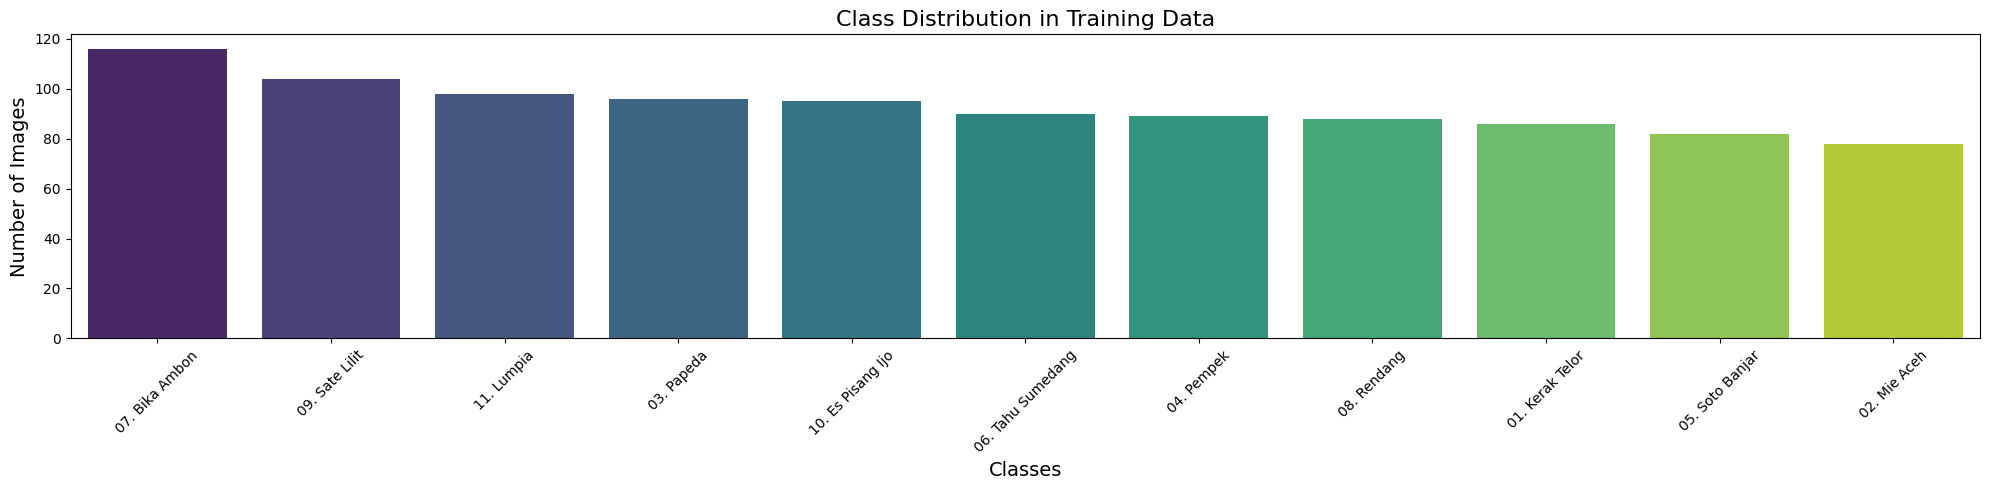

In [7]:
# Descriptive Statistics Visualization
# Retrieve the number of images per class
image_files = glob.glob(TRAIN_DIR + '/*/*')
class_labels = [os.path.basename(os.path.dirname(file)) for file in image_files]
class_counts = pd.Series(class_labels).value_counts()

# Visualize the class distribution
plt.figure(figsize=(20, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution in Training Data', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Display descriptive statistics for image counts
print("Descriptive Statistics for Image Counts:")
print(class_counts.describe())

Descriptive Statistics for Image Counts:
count     11.000000
mean      92.909091
std       10.643820
min       78.000000
25%       87.000000
50%       90.000000
75%       97.000000
max      116.000000
Name: count, dtype: float64


## **8. Visualize Sample of Augmentation**

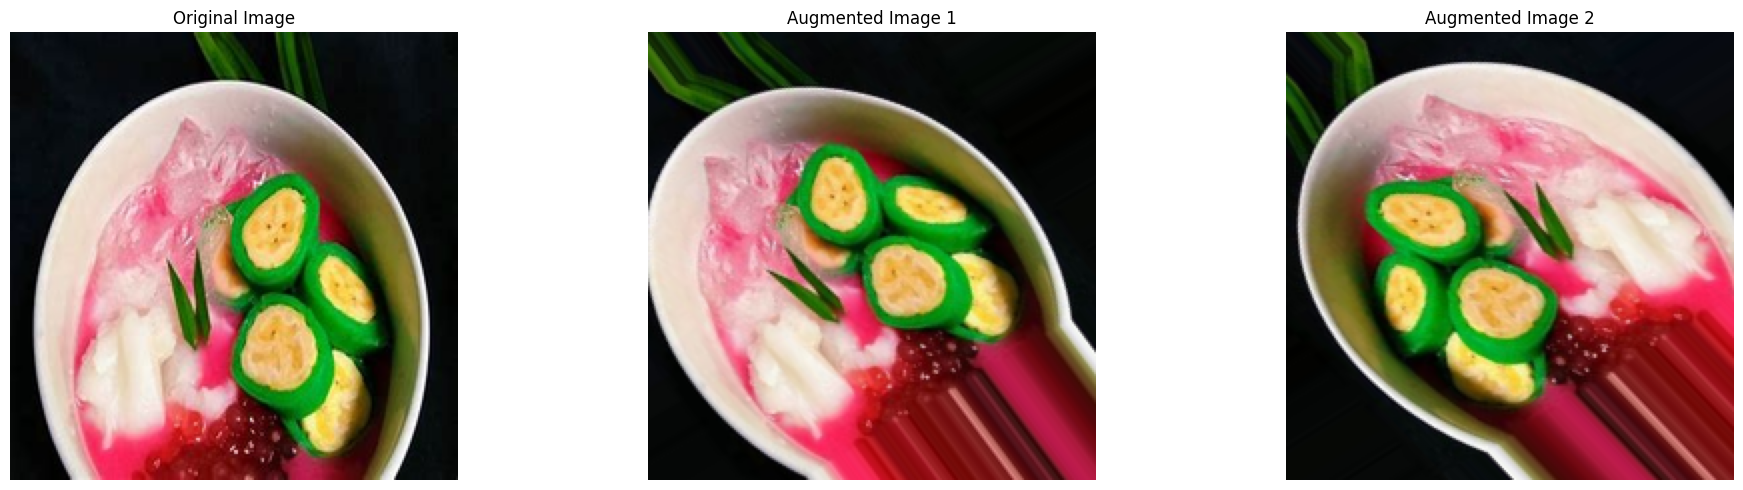

In [9]:
# Load and preprocess image
sample_image = np.array(Image.open(image_files[5]).resize(IMAGE_SIZE)) / 255.0
sample_image = sample_image.reshape((1,) + sample_image.shape)

# Set up ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
    zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'
)

# Generate augmented images
augmented_images = [sample_image[0]] + [next(datagen.flow(sample_image, batch_size=1))[0] for _ in range(2)]

# Plot original and augmented images
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
titles = ["Original Image", "Augmented Image 1", "Augmented Image 2"]
for i, img in enumerate(augmented_images):
    ax[i].imshow(img)
    ax[i].set_title(titles[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## **9. Build Architecture**

9406464/9406464 [==============================] - 0s 0us/step


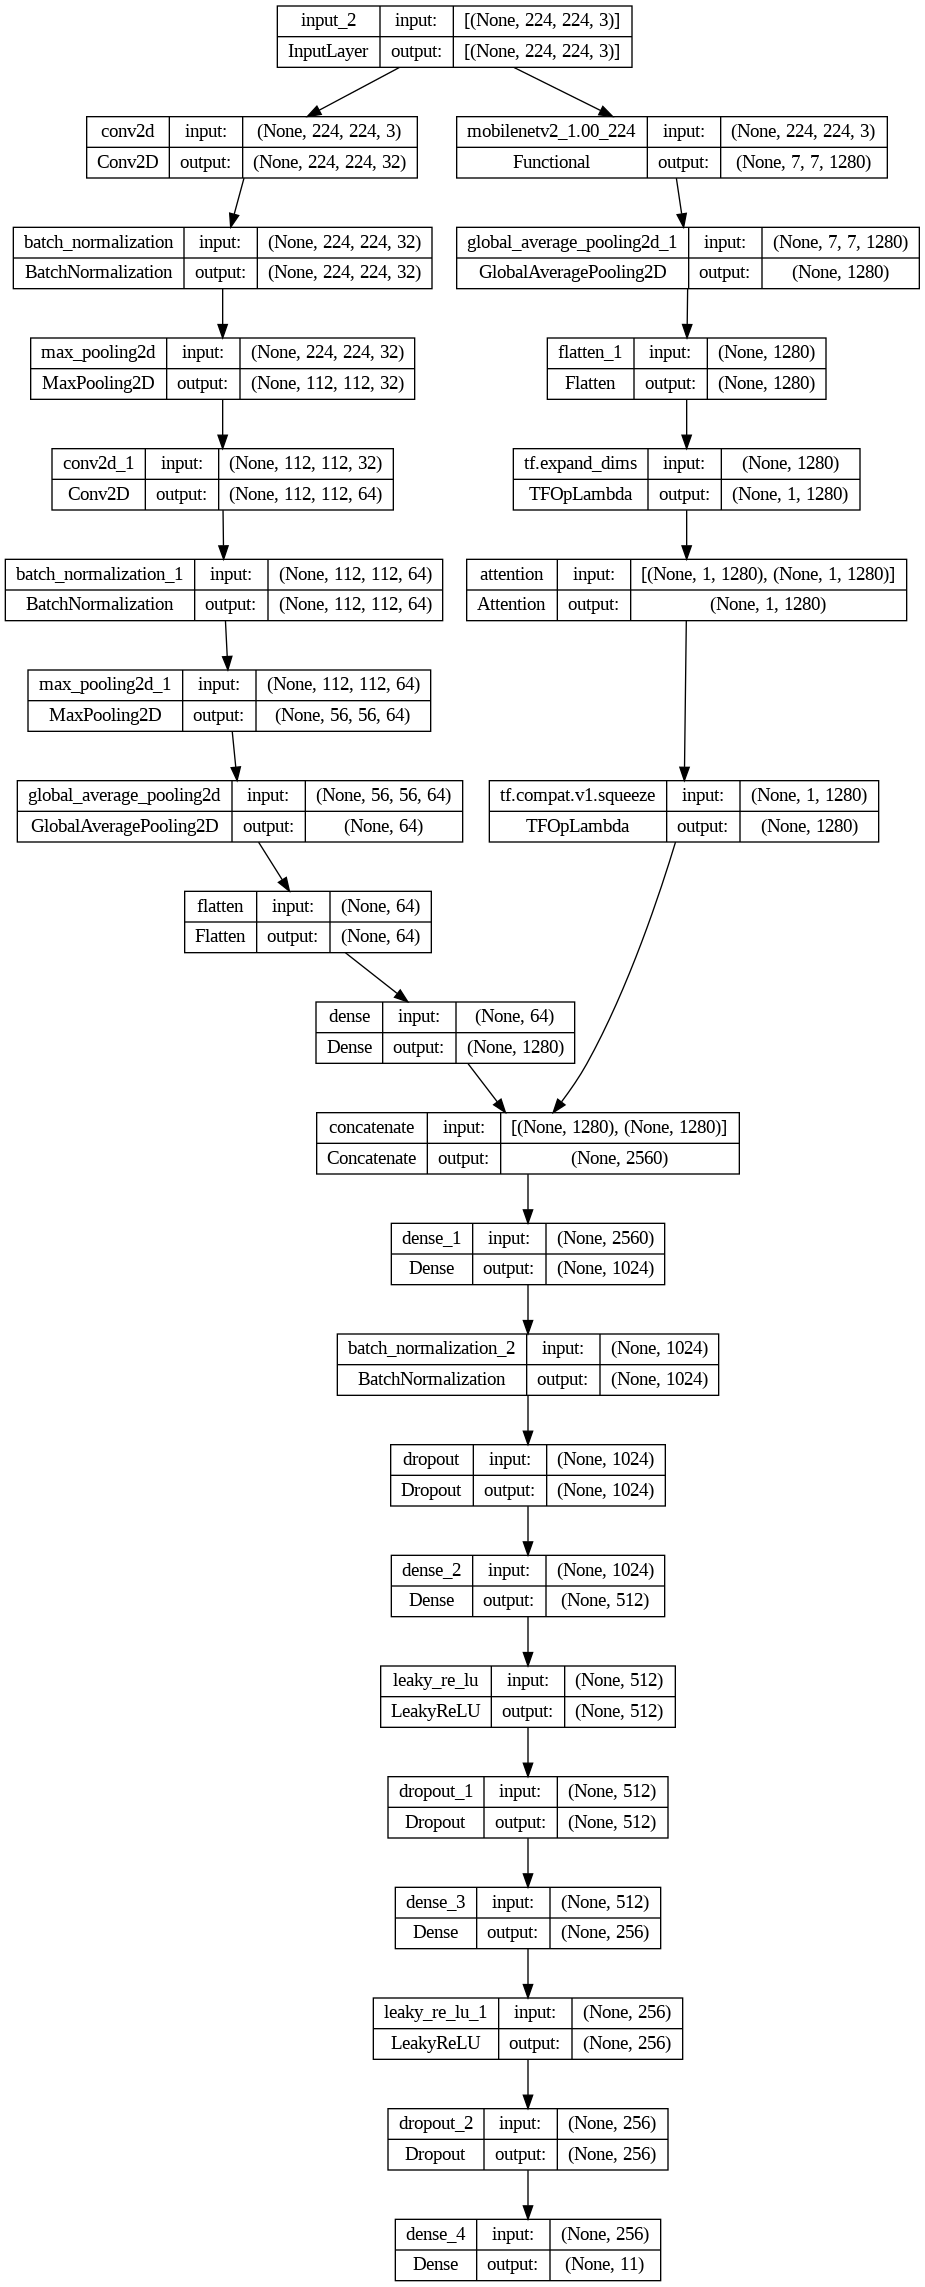

In [10]:
# Define Attention Module
def attention_module(inputs):
    # Attention mechanism using a simple dot-product attention
    attention = layers.Attention()([inputs, inputs])
    return attention

def attention_module(inputs):
    # Expand dimensions to make inputs compatible with Attention layer
    inputs_expanded = tf.expand_dims(inputs, axis=1)  # Add sequence length dimension
    attention = layers.Attention()([inputs_expanded, inputs_expanded])
    return tf.squeeze(attention, axis=1)  # Remove the sequence length dimension

# Define the Fine-Tuned Model
def create_model():
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Fine-Tuning: Unfreeze the last 4 layers of MobileNetV2
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    # Multi-Branch Architecture
    input = layers.Input(shape=(224, 224, 3))

    # Branch 1 - CNN Layers with Residual Connections
    x1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.MaxPooling2D()(x1)
    x1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.MaxPooling2D()(x1)
    x1 = layers.GlobalAveragePooling2D()(x1)

    # Branch 2 - MobileNetV2 as feature extractor
    x2 = base_model(input)
    x2 = layers.GlobalAveragePooling2D()(x2)

    # Flatten both x1 and x2
    x1 = layers.Flatten()(x1)
    x2 = layers.Flatten()(x2)

    # Ensure both branches have the same shape by adding Dense layers if necessary
    x1_shape = x1.shape[-1]
    x2_shape = x2.shape[-1]

    if x1_shape != x2_shape:
        if x1_shape < x2_shape:
            x1 = layers.Dense(x2_shape, activation='relu')(x1)
        else:
            x2 = layers.Dense(x1_shape, activation='relu')(x2)

    # Attention Layer
    x2 = attention_module(x2)

    # Merging Branches with Enhanced Fine-Tuning
    x = layers.concatenate([x1, x2])

    # Add more Dense layers and Batch Normalization
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.6)(x)

    # Additional Dense layer with LeakyReLU activation
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.3)(x)
    x = layers.Dropout(0.5)(x)

    # Additional layer to decrease dimension gradually
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU(alpha=0.3)(x)
    x = layers.Dropout(0.4)(x)

    # Output Layer
    output = layers.Dense(len(train_dataset.class_indices), activation='softmax')(x)

    # Build and compile model
    model = models.Model(inputs=input, outputs=output)
    model.compile(optimizer=Nadam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

    return model

# Create and summarize the model
classification_model = create_model()

# Visualize and save the model architecture
plot_model(classification_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

## **10. Training and Evaluation**

In [11]:
class CustomStopCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.98 and logs.get('val_loss') <= 0.3:
            print(f"Stopping training at epoch {epoch+1} due to accuracy >= 0.98 and val_loss <= 0.3")
            self.model.stop_training = True

history_model = classification_model.fit(
    train_dataset,
    epochs=512,
    validation_data=validation_dataset,
    callbacks=[CustomStopCallback()]
)

Epoch 1/512
32/32 [==============================] - 260s 8s/step - loss: 4.1577 - accuracy: 0.1389 - val_loss: 2.0779 - val_accuracy: 0.3371
Epoch 2/512
32/32 [==============================] - 20s 639ms/step - loss: 2.5466 - accuracy: 0.3601 - val_loss: 1.5572 - val_accuracy: 0.6966
Epoch 3/512
32/32 [==============================] - 22s 700ms/step - loss: 1.8537 - accuracy: 0.4824 - val_loss: 1.1101 - val_accuracy: 0.8652
Epoch 4/512
32/32 [==============================] - 22s 695ms/step - loss: 1.3342 - accuracy: 0.6282 - val_loss: 0.8076 - val_accuracy: 0.8764
Epoch 5/512
32/32 [==============================] - 21s 645ms/step - loss: 1.0951 - accuracy: 0.6566 - val_loss: 0.6128 - val_accuracy: 0.8764
Epoch 6/512
32/32 [==============================] - 21s 650ms/step - loss: 0.9348 - accuracy: 0.7172 - val_loss: 0.5130 - val_accuracy: 0.8764
Epoch 7/512
32/32 [==============================] - 22s 696ms/step - loss: 0.8358 - accuracy: 0.7524 - val_loss: 0.4626 - val_accuracy: 0

## **11. Performance Visualization**

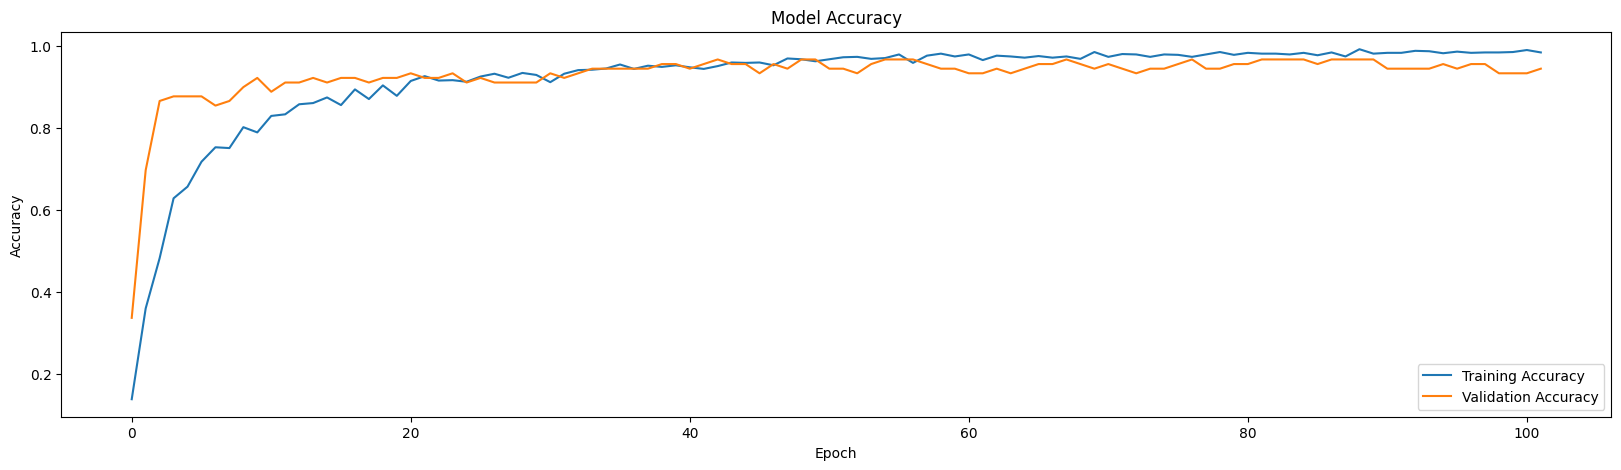

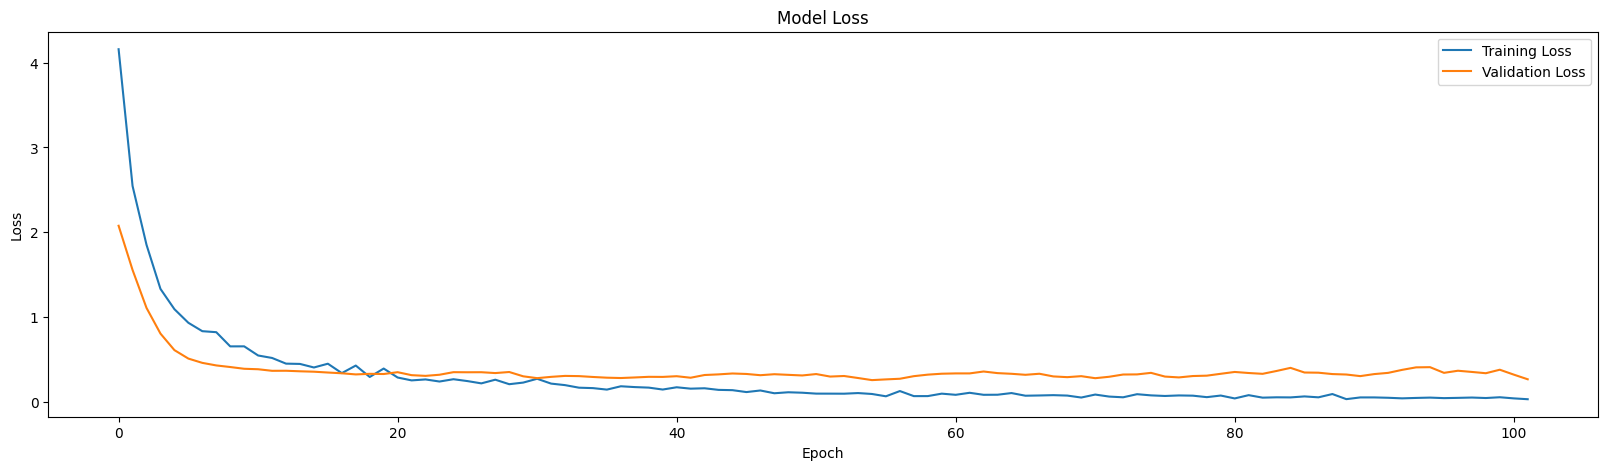

In [29]:
# Visualizing Model Performance: Accuracy and Loss
plt.figure(figsize=(20, 5))
plt.plot(history_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(history_model.history['loss'], label='Training Loss')
plt.plot(history_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **12. Predict Image From Test Dataset**

In [30]:
def predict_from_test_folder(test_folder_path, model):
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_folder_path,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode=None,
        shuffle=False
    )

    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    predicted_class_indices = np.argmax(predictions, axis=1)
    class_labels = list(test_generator.class_indices.keys())
    predicted_class_names = [class_labels[i] for i in predicted_class_indices]

    for filename, class_name in zip(test_generator.filenames, predicted_class_names):
        print(f'File: {filename} -> Predicted Class: {class_name}')

predict_from_test_folder(TEST_DIR, classification_model)

Found 33 images belonging to 11 classes.
2/2 [==============================] - 0s 56ms/step
File: 01. Kerak Telor/kerak-telor-12_jpg.rf.926782218c6fcf2a7cd0c273fc96cfca.jpg -> Predicted Class: 01. Kerak Telor
File: 01. Kerak Telor/kerak-telor-5_jpg.rf.eea991790e94450e61ca26856b6cac3e.jpg -> Predicted Class: 01. Kerak Telor
File: 02. Mie Aceh/Mie-Aceh-11_jpg.rf.3e335854e93515a60e2abe4b5e18467f.jpg -> Predicted Class: 02. Mie Aceh
File: 02. Mie Aceh/Mie-Aceh-1_jpg.rf.6a5499fdd491ed09bf7cbd290d27006e.jpg -> Predicted Class: 02. Mie Aceh
File: 02. Mie Aceh/Mie-Aceh-29_jpg.rf.b9b519e03d84a7085b371f5b209fb0f9.jpg -> Predicted Class: 02. Mie Aceh
File: 02. Mie Aceh/Mie-Aceh-38_jpg.rf.cd026f018439eda70553b97245d8263c.jpg -> Predicted Class: 02. Mie Aceh
File: 03. Papeda/Papeda-12_jpg.rf.8af1a74256153adae9b0cceb3398899c.jpg -> Predicted Class: 03. Papeda
File: 03. Papeda/Papeda-17_jpg.rf.42a155b59e064afc5db25a6ef3f45478.jpg -> Predicted Class: 03. Papeda
File: 03. Papeda/Papeda-6_jpg.rf.0b1a84

## **13. Save the Model**

In [31]:
classification_model.save('/content/drive/MyDrive/Machine-Learning-Classification/save-model/classification_model.h5')
print("Training Complete and Model Saved Successfully!")

Training Complete and Model Saved Successfully!
